In [ ]:
from google.colab import files
uploaded = files.upload()


Saving world-championship-2023-embryo-classification.zip to world-championship-2023-embryo-classification.zip


In [ ]:
import zipfile
import os

zip_file = "/content/world-championship-2023-embryo-classification.zip"  # Change name if different

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("embryo_dataset")

# Check extraction
os.listdir("embryo_dataset")


['hvwc23']

In [ ]:
import pandas as pd
import os

image_paths = []
labels = []

for label in ['0', '1']:
    folder_path = os.path.join("embryo_dataset", label)
    if os.path.exists(folder_path):
        for filename in os.listdir(folder_path):
            if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
                image_paths.append(os.path.join(folder_path, filename))
                labels.append(int(label))

df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

df.shape


(0, 2)

In [ ]:
print(df['label'].value_counts())
df.info()


Series([], Name: count, dtype: int64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image_path  0 non-null      float64
 1   label       0 non-null      float64
dtypes: float64(2)
memory usage: 132.0 bytes


In [ ]:
import os

# Show contents of main extraction folder
os.listdir("/content/embryo_dataset")


['hvwc23']

In [ ]:
import pandas as pd
import os

base_dir = "/content/embryo_dataset/hvwc23"  # <-- Corrected base directory

image_paths = []
labels = []

for label in ['0', '1']:
    folder_path = os.path.join(base_dir, label)
    if os.path.exists(folder_path):
        for filename in os.listdir(folder_path):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_paths.append(os.path.join(folder_path, filename))
                labels.append(int(label))

df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

print(df.shape)
print(df['label'].value_counts())


(0, 2)
Series([], Name: count, dtype: int64)


In [ ]:
import os

for root, dirs, files in os.walk("/content/embryo_dataset/hvwc23"):
    print(f"\nDirectory: {root}")
    print("Subdirectories:", dirs)
    print("Files:", files[:5])  # Show only first 5 files for brevity



Directory: /content/embryo_dataset/hvwc23
Subdirectories: ['test', 'train']
Files: ['test.csv', 'sample_submission.csv', 'train.csv']

Directory: /content/embryo_dataset/hvwc23/test
Subdirectories: []
Files: ['D3_149.jpg', 'D3_432.jpg', 'D3_297.jpg', 'D3_659.jpg', 'D5_388.jpg']

Directory: /content/embryo_dataset/hvwc23/train
Subdirectories: []
Files: ['D5_176.jpg', 'D5_028.jpg', 'D3_177.jpg', 'D3_204.jpg', 'D3_054.jpg']


In [ ]:
import pandas as pd

train_csv_path = "/content/embryo_dataset/hvwc23/train.csv"
df = pd.read_csv(train_csv_path)

print("Columns in CSV:", df.columns.tolist())
df.head()


Columns in CSV: ['Image', 'Class']


,Image,Class
0,D3_405.jpg,0
1,D3_523.jpg,0
2,D3_750.jpg,0
3,D3_427.jpg,0
4,D3_042.jpg,0


In [ ]:
import pandas as pd
import os

# Load CSV
df = pd.read_csv("/content/embryo_dataset/hvwc23/train.csv")

# Add image paths based on the "Image" column
df['image_path'] = df['Image'].apply(lambda x: os.path.join("/content/embryo_dataset/hvwc23/train", x))

# Rename "Class" to "label" to match original code
df = df.rename(columns={'Class': 'label'})

# Keep only relevant columns
df = df[['image_path', 'label']]

# Check the data
print(df.shape)
print(df['label'].value_counts())
df.head()


(840, 2)
label
0    716
1    124
Name: count, dtype: int64


,image_path,label
0,/content/embryo_dataset/hvwc23/train/D3_405.jpg,0
1,/content/embryo_dataset/hvwc23/train/D3_523.jpg,0
2,/content/embryo_dataset/hvwc23/train/D3_750.jpg,0
3,/content/embryo_dataset/hvwc23/train/D3_427.jpg,0
4,/content/embryo_dataset/hvwc23/train/D3_042.jpg,0


/tmp/ipython-input-362495536.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="label", palette="viridis")


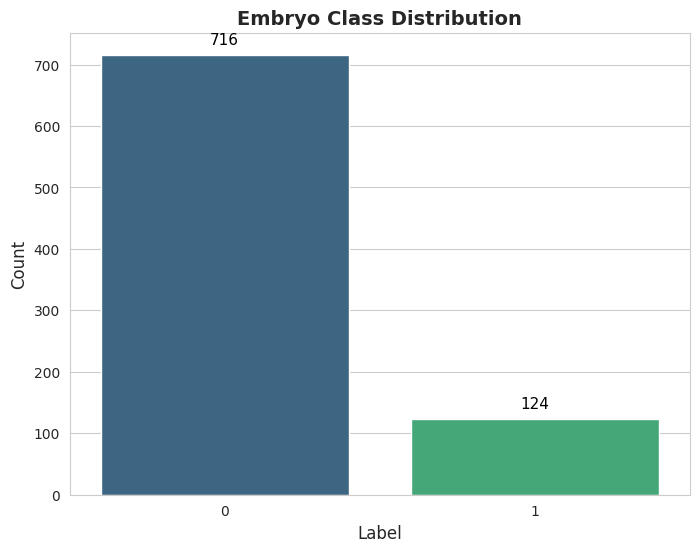

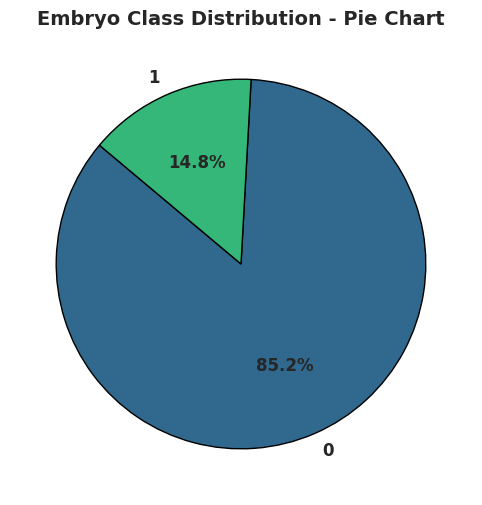

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x="label", palette="viridis")
ax.set_title("Embryo Class Distribution", fontsize=14, fontweight='bold')
ax.set_xlabel("Label", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

# Pie chart
label_counts = df["label"].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette("viridis", len(label_counts))
ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%',
       startangle=140, colors=colors, textprops={'fontsize': 12, 'weight': 'bold'},
       wedgeprops={'edgecolor': 'black', 'linewidth': 1})
ax.set_title("Embryo Class Distribution - Pie Chart", fontsize=14, fontweight='bold')
plt.show()


✅ Good Embryos (Class 1):


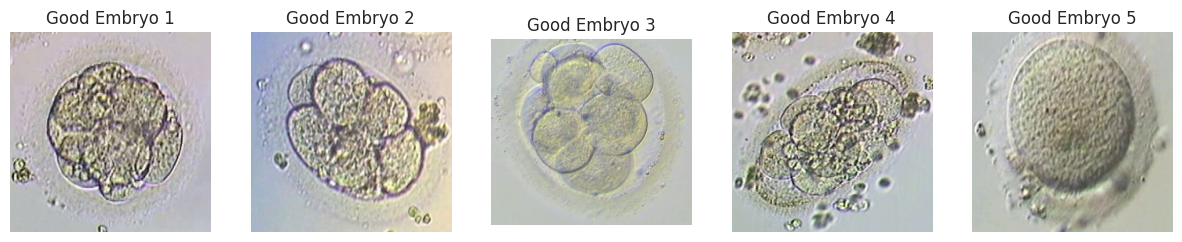

❌ Not Good Embryos (Class 0):


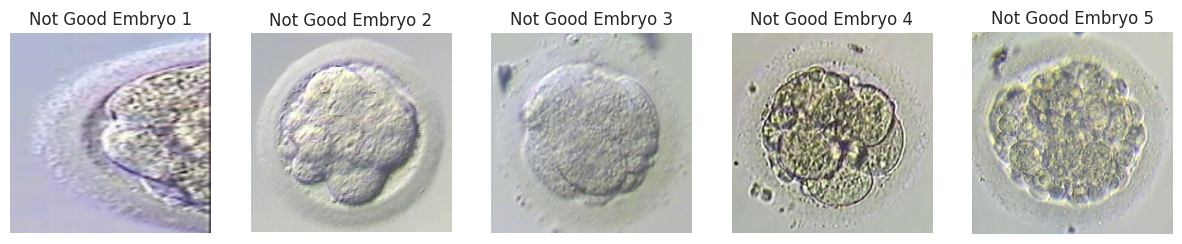

In [ ]:
import cv2

def display_images(image_paths, title):
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_paths[:5]):
        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(1, 5, i+1)
            plt.imshow(img)
            plt.title(f"{title} {i+1}")
            plt.axis('off')
        else:
            print(f"Image not found: {img_path}")
    plt.show()

good_images = df[df['label'] == 1]['image_path'].tolist()
not_good_images = df[df['label'] == 0]['image_path'].tolist()

print("✅ Good Embryos (Class 1):")
display_images(good_images, "Good Embryo")

print("❌ Not Good Embryos (Class 0):")
display_images(not_good_images, "Not Good Embryo")


In [ ]:
from sklearn.utils import resample

max_count = df['label'].value_counts().max()

dfs = []
for label in df['label'].unique():
    class_subset = df[df['label'] == label]
    class_upsampled = resample(class_subset,
                               replace=True,
                               n_samples=max_count,
                               random_state=42)
    dfs.append(class_upsampled)

df_balanced = pd.concat(dfs).sample(frac=1, random_state=42).reset_index(drop=True)
df = df_balanced

# Re-check new balanced counts
print("✅ Balanced class distribution:")
print(df['label'].value_counts())


✅ Balanced class distribution:
label
0    716
1    716
Name: count, dtype: int64


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 289ms/step - accuracy: 0.6705 - loss: 3.0249 - val_accuracy: 0.5017 - val_loss: 6.5977
Epoch 2/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.8140 - loss: 0.5513 - val_accuracy: 0.7631 - val_loss: 1.0940
Epoch 3/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.8525 - loss: 0.4296 - val_accuracy: 0.7422 - val_loss: 1.5679
Epoch 4/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - accuracy: 0.8526 - loss: 0.4310 - val_accuracy: 0.8467 - val_loss: 0.5349
Epoch 5/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.8532 - loss: 0.5534 - val_accuracy: 0.8815 - val_loss: 0.3796
Epoch 6/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.9080 - loss: 0.3767 - val_accuracy: 0.9268 - val_loss: 0.2615
Epoch 7/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9117 - loss: 0.2271 - val_accuracy: 0.9303 - val_loss: 0.3384
Epoch 8/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.9616 - loss: 0.1276 - val_accuracy: 0.9443 - val_loss: 

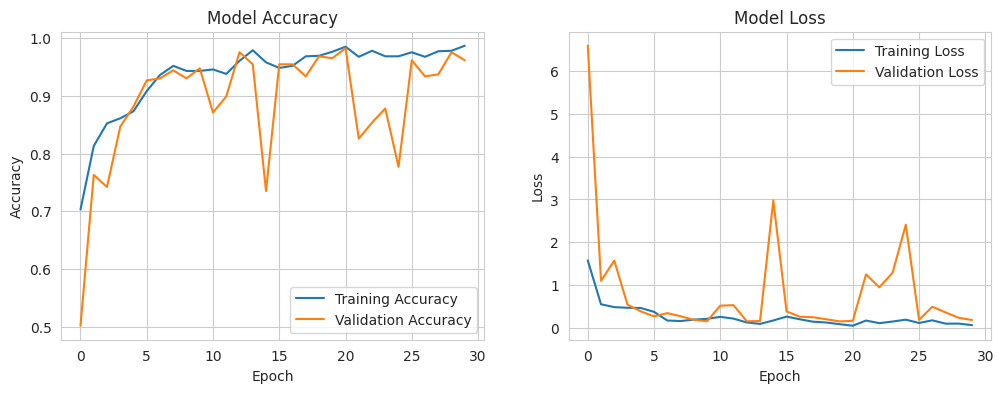

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 216ms/step


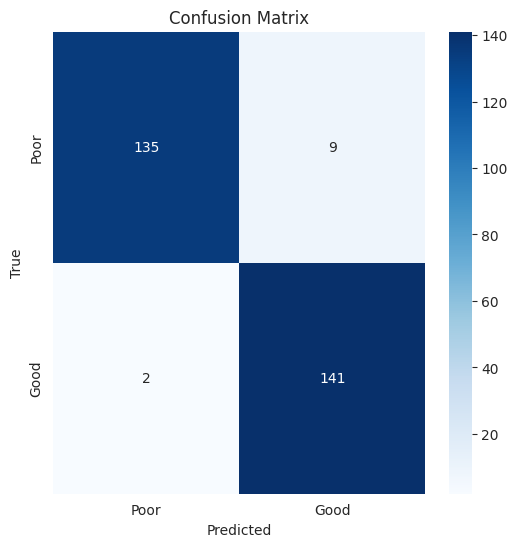

Classification Report:
              precision    recall  f1-score   support

        Poor       0.99      0.94      0.96       144
        Good       0.94      0.99      0.96       143

    accuracy                           0.96       287
   macro avg       0.96      0.96      0.96       287
weighted avg       0.96      0.96      0.96       287



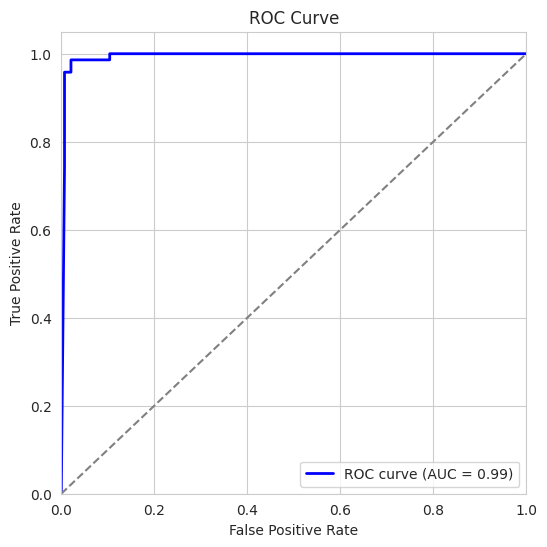

AUC Score: 0.9939


In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense,
    Dropout, Input, GlobalAveragePooling2D, Concatenate, Layer, Lambda, LeakyReLU
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess images
def load_images(df, img_size=(128, 128)):
    images, labels = [], []
    for idx, row in df.iterrows():
        if os.path.exists(row['image_path']):
            img = cv2.imread(row['image_path'])
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, img_size)
            images.append(img.astype(np.float32))
            labels.append(row['label'])
    return np.array(images, dtype=np.float32), np.array(labels, dtype=np.int32)

X, y = load_images(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

datagen = ImageDataGenerator(rotation_range=10, horizontal_flip=True, fill_mode='nearest', dtype='float32')
datagen.fit(X_train)

# Knowledge Graph Triples
kg_triples = [
    "embryo, has_quality, blastocyst_expansion",
    "embryo, has_quality, cell_symmetry",
    "embryo, has_quality, inner_cell_mass",
    "embryo, has_quality, trophectoderm_quality"
]

def embed_triples(triples, embed_dim=32):
    tokenizer = tf.keras.preprocessing.text.Tokenizer()
    tokenizer.fit_on_texts(triples)
    sequences = tokenizer.texts_to_sequences(triples)
    padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=10, padding='post')
    embedding_layer = tf.keras.layers.Embedding(
        len(tokenizer.word_index) + 1,
        embed_dim,
        dtype='float32'
    )
    return tf.cast(embedding_layer(padded), tf.float32)

triple_embeddings = embed_triples(kg_triples)

# Knowledge-Guided Attention Layer
class KGAttentionLayer(Layer):
    def __init__(self, embed_dim=32, **kwargs):
        super(KGAttentionLayer, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.q_dense = Dense(self.embed_dim, dtype='float32')
        self.k_dense = Dense(self.embed_dim, dtype='float32')
        self.v_dense = Dense(self.embed_dim, dtype='float32')

    def call(self, inputs):
        cnn_features, triple_embeds = inputs
        cnn_features = tf.cast(cnn_features, tf.float32)
        triple_embeds = tf.cast(triple_embeds, tf.float32)

        batch_size = tf.shape(cnn_features)[0]
        cnn_flat = GlobalAveragePooling2D()(cnn_features)

        triple_embeds = tf.repeat(tf.expand_dims(triple_embeds, 0), batch_size, axis=0)
        triple_flat = tf.reduce_mean(triple_embeds, axis=2)

        q = self.q_dense(triple_flat)
        k = self.k_dense(tf.expand_dims(cnn_flat, 1))
        v = self.v_dense(tf.expand_dims(cnn_flat, 1))

        attn_scores = tf.matmul(q, k, transpose_b=True)
        attn_weights = tf.nn.softmax(attn_scores, axis=-1)
        out = tf.matmul(attn_weights, v)
        return tf.reduce_mean(out, axis=1)

# UGNet++ Block

def resize_like(tensor_to_resize, ref_tensor):
    def resize_fn(tensors):
        t1, t2 = tensors
        shape = tf.shape(t2)[1:3]
        return tf.image.resize(t1, shape, method='bilinear')
    return Lambda(resize_fn, dtype='float32')([tensor_to_resize, ref_tensor])

def conv_block(x, filters, name):
    x = Conv2D(filters, (3, 3), padding='same', name=f'{name}_conv', dtype='float32')(x)
    x = BatchNormalization(name=f'{name}_bn', dtype='float32')(x)
    x = LeakyReLU(negative_slope=0.1, name=f'{name}_lrelu', dtype='float32')(x)
    return x

def nested_ugnet_plus_layer():
    def layer_fn(input_tensor):
        x0_0 = conv_block(input_tensor, 16, 'x0_0')
        x1_0 = MaxPooling2D((2, 2), dtype='float32')(x0_0)
        x1_0 = conv_block(x1_0, 32, 'x1_0')
        x0_1 = conv_block(Concatenate(dtype='float32')([x0_0, resize_like(x1_0, x0_0)]), 16, 'x0_1')

        x2_0 = MaxPooling2D((2, 2), dtype='float32')(x1_0)
        x2_0 = conv_block(x2_0, 64, 'x2_0')
        x1_1 = conv_block(Concatenate(dtype='float32')([x1_0, resize_like(x2_0, x1_0)]), 32, 'x1_1')
        x0_2 = conv_block(Concatenate(dtype='float32')([x0_0, x0_1, resize_like(x1_1, x0_0)]), 16, 'x0_2')

        x3_0 = MaxPooling2D((2, 2), dtype='float32')(x2_0)
        x3_0 = conv_block(x3_0, 128, 'x3_0')
        x2_1 = conv_block(Concatenate(dtype='float32')([x2_0, resize_like(x3_0, x2_0)]), 64, 'x2_1')
        x1_2 = conv_block(Concatenate(dtype='float32')([x1_0, x1_1, resize_like(x2_1, x1_0)]), 32, 'x1_2')
        x0_3 = conv_block(Concatenate(dtype='float32')([x0_0, x0_1, x0_2, resize_like(x1_2, x0_0)]), 16, 'x0_3')

        return x0_3
    return layer_fn

# Model
def build_model():
    input_img = Input(shape=(128, 128, 3), name="input_img", dtype='float32')
    x = nested_ugnet_plus_layer()(input_img)
    flattened = Flatten(dtype='float32')(x)
    drop = Dropout(0.3, dtype='float32')(flattened)

    kg_agg = KGAttentionLayer(embed_dim=32)([x, triple_embeddings])
    concat = Concatenate(dtype='float32')([drop, kg_agg])

    dense1 = Dense(64, dtype='float32')(concat)
    dense1 = LeakyReLU(negative_slope=0.1, dtype='float32')(dense1)
    drop2 = Dropout(0.3, dtype='float32')(dense1)
    output = Dense(2, activation='softmax', dtype='float32')(drop2)

    model = Model(inputs=input_img, outputs=output)
    model.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

model = build_model()
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=16),
    epochs=30,
    validation_data=(X_test, y_test)
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Poor', 'Good'], yticklabels=['Poor', 'Good'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=['Poor', 'Good']))

y_pred_proba = y_pred[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"AUC Score: {roc_auc:.4f}")

Enter path for image 1: /content/embryo_dataset/hvwc23/train/D5_155.jpg
Enter path for image 2: /content/embryo_dataset/hvwc23/train/D3_001.jpg
Enter path for image 3: /content/embryo_dataset/hvwc23/train/D5_288.jpg


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_img']]
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)
/tmp/ipython-input-24-3098423245.py:99: UserWarning: Glyph 129001 (\N{LARGE GREEN SQUARE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-24-3098423245.py:99: UserWarning: Glyph 128997 (\N{LARGE RED SQUARE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129001 (\N{LARGE GREEN SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128997 (\N{LARGE RED SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


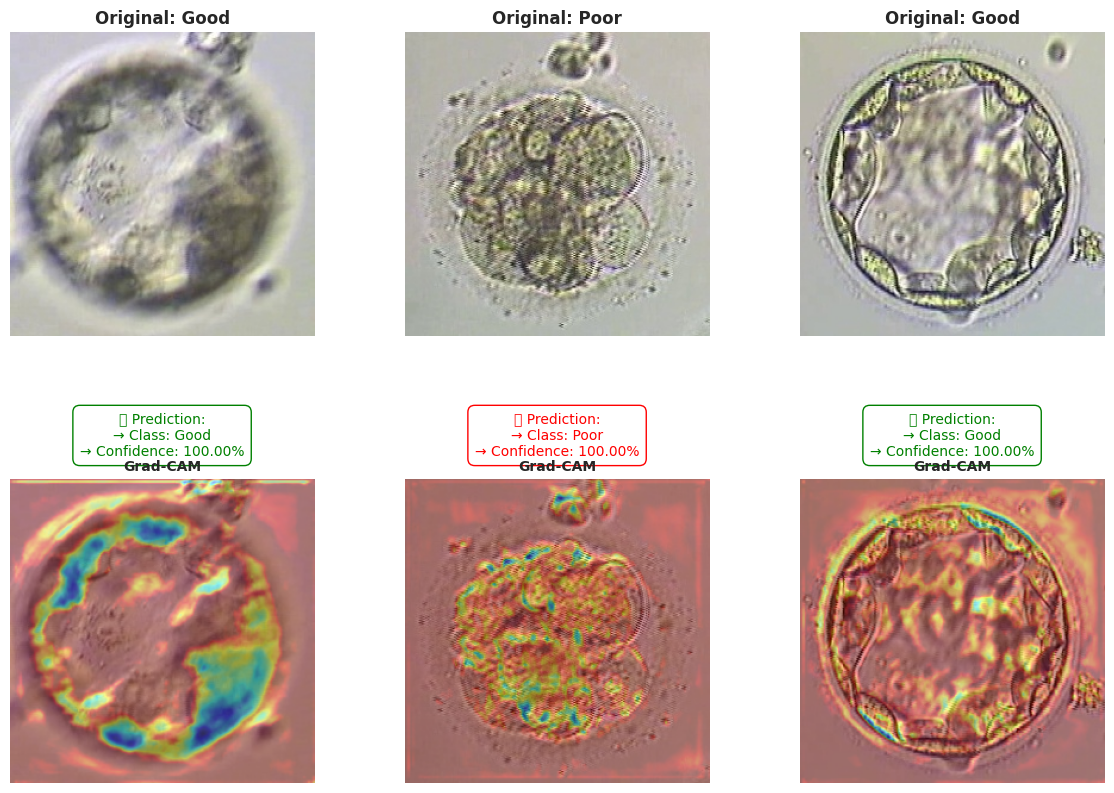

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model

# ------------------------- Grad-CAM Utility Functions -------------------------
def compute_gradcam(model, img_array, layer_name='x0_3_lrelu'):
    grad_model = Model(
        inputs=[model.inputs],
        outputs=[model.get_layer(layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = np.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy()

def overlay_gradcam(heatmap, img, alpha=0.4):
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    cam = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    combined = cv2.addWeighted(img, 1 - alpha, cam, alpha, 0)
    return combined

# ------------------------- Predict and Explain Function -------------------------
def predict_and_explain(model, img_paths, label_csv_path, img_size=(128, 128)):
    label_map = {0: "Poor", 1: "Good"}

    # Load labels from CSV
    df_labels = pd.read_csv(label_csv_path)
    label_dict = dict(zip(df_labels['Image'], df_labels['Class']))

    n_imgs = len(img_paths)
    fig, axs = plt.subplots(2, n_imgs, figsize=(4 * n_imgs, 8))

    for idx, path in enumerate(img_paths):
        if not os.path.exists(path):
            print(f"❌ File not found: {path}")
            continue

        file_name = os.path.basename(path)
        true_label_idx = label_dict.get(file_name, -1)
        true_label = label_map.get(true_label_idx, "Unknown")

        # Load and preprocess image
        img = cv2.imread(path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_resized = cv2.resize(img_rgb, img_size)
        img_input = np.expand_dims(img_resized.astype(np.float32), axis=0)

        # Prediction
        pred = model.predict(img_input, verbose=0)
        pred_class = np.argmax(pred[0])
        confidence = np.max(pred[0])
        pred_label = label_map[pred_class]

        # Grad-CAM
        heatmap = compute_gradcam(model, img_input)
        cam_image = overlay_gradcam(heatmap, img_rgb)

        # Top row: Original + Prediction box
        axs[0, idx].imshow(img_rgb)
        axs[0, idx].axis('off')
        axs[0, idx].set_title(f"Original: {true_label}", fontsize=12, fontweight='bold')

        # Prediction box formatting
        box_color = 'green' if pred_class == 1 else 'red'
        emoji = "🟩" if pred_class == 1 else "🟥"
        pred_text = (
            f"{emoji} Prediction:\n→ Class: {pred_label}\n→ Confidence: {confidence * 100:.2f}%"
        )

        axs[0, idx].text(
            0.5, -0.25, pred_text,
            ha='center', va='top', transform=axs[0, idx].transAxes,
            fontsize=10,
            color=box_color,
            bbox=dict(facecolor='white', edgecolor=box_color, boxstyle='round,pad=0.5')
        )

        # Bottom row: Grad-CAM
        axs[1, idx].imshow(cam_image)
        axs[1, idx].axis('off')
        axs[1, idx].set_title("Grad-CAM", fontsize=10, fontweight='bold')

    axs[0, 0].set_ylabel("Input + Prediction", fontsize=13, fontweight='bold')
    axs[1, 0].set_ylabel("Explainability", fontsize=13, fontweight='bold')

    plt.tight_layout()
    plt.show()

# ------------------------- Run -------------------------
img_paths = []
for idx in range(1, 4):
    path = input(f"Enter path for image {idx}: ").strip()
    img_paths.append(path)

# ✅ Update this to match your dataset CSV location
csv_path = "/content/embryo_dataset/hvwc23/train.csv"

# ✅ Make sure 'model' is already loaded/trained before this
predict_and_explain(model, img_paths, csv_path)


Enter path for image 1: /content/embryo_dataset/hvwc23/train/D3_026.jpg
Enter path for image 2: /content/embryo_dataset/hvwc23/train/D3_010.jpg
Enter path for image 3: /content/embryo_dataset/hvwc23/train/D3_746.jpg


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_img']]
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)
/tmp/ipython-input-3098423245.py:99: UserWarning: Glyph 128997 (\N{LARGE RED SQUARE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128997 (\N{LARGE RED SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


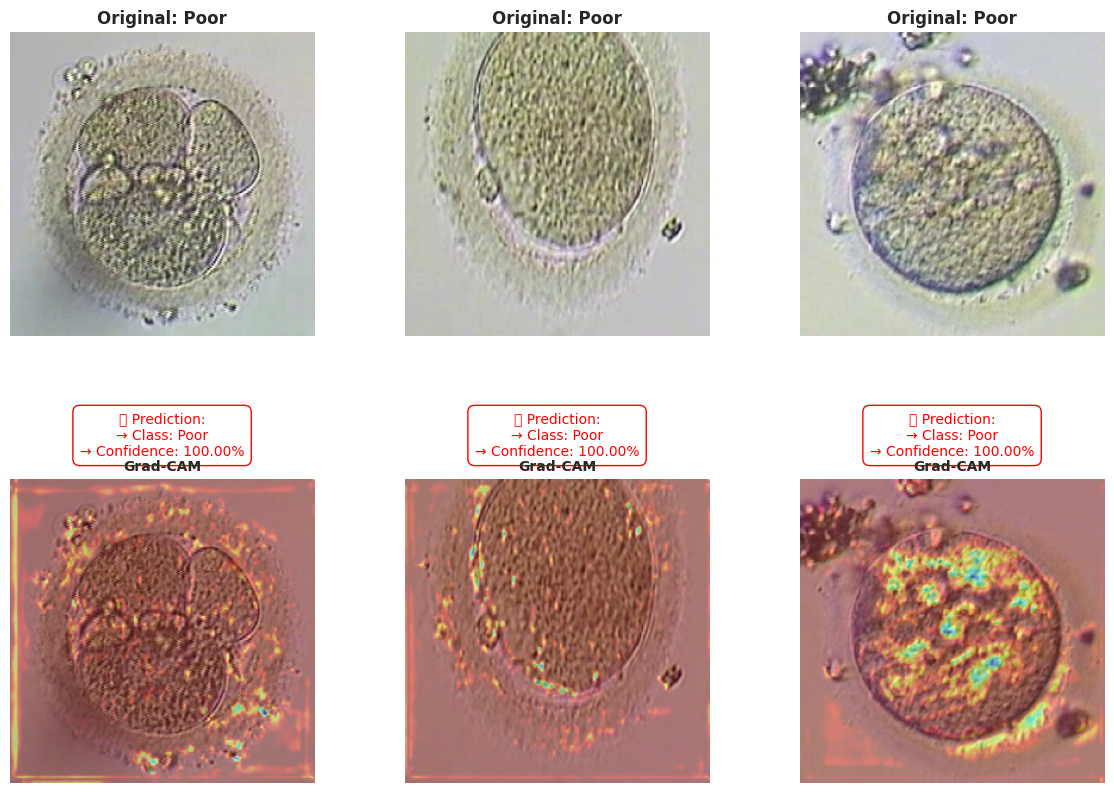

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model

# ------------------------- Grad-CAM Utility Functions -------------------------
def compute_gradcam(model, img_array, layer_name='x0_3_lrelu'):
    grad_model = Model(
        inputs=[model.inputs],
        outputs=[model.get_layer(layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = np.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy()

def overlay_gradcam(heatmap, img, alpha=0.4):
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    cam = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    combined = cv2.addWeighted(img, 1 - alpha, cam, alpha, 0)
    return combined

# ------------------------- Predict and Explain Function -------------------------
def predict_and_explain(model, img_paths, label_csv_path, img_size=(128, 128)):
    label_map = {0: "Poor", 1: "Good"}

    # Load labels from CSV
    df_labels = pd.read_csv(label_csv_path)
    label_dict = dict(zip(df_labels['Image'], df_labels['Class']))

    n_imgs = len(img_paths)
    fig, axs = plt.subplots(2, n_imgs, figsize=(4 * n_imgs, 8))

    for idx, path in enumerate(img_paths):
        if not os.path.exists(path):
            print(f"❌ File not found: {path}")
            continue

        file_name = os.path.basename(path)
        true_label_idx = label_dict.get(file_name, -1)
        true_label = label_map.get(true_label_idx, "Unknown")

        # Load and preprocess image
        img = cv2.imread(path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_resized = cv2.resize(img_rgb, img_size)
        img_input = np.expand_dims(img_resized.astype(np.float32), axis=0)

        # Prediction
        pred = model.predict(img_input, verbose=0)
        pred_class = np.argmax(pred[0])
        confidence = np.max(pred[0])
        pred_label = label_map[pred_class]

        # Grad-CAM
        heatmap = compute_gradcam(model, img_input)
        cam_image = overlay_gradcam(heatmap, img_rgb)

        # Top row: Original + Prediction box
        axs[0, idx].imshow(img_rgb)
        axs[0, idx].axis('off')
        axs[0, idx].set_title(f"Original: {true_label}", fontsize=12, fontweight='bold')

        # Prediction box formatting
        box_color = 'green' if pred_class == 1 else 'red'
        emoji = "🟩" if pred_class == 1 else "🟥"
        pred_text = (
            f"{emoji} Prediction:\n→ Class: {pred_label}\n→ Confidence: {confidence * 100:.2f}%"
        )

        axs[0, idx].text(
            0.5, -0.25, pred_text,
            ha='center', va='top', transform=axs[0, idx].transAxes,
            fontsize=10,
            color=box_color,
            bbox=dict(facecolor='white', edgecolor=box_color, boxstyle='round,pad=0.5')
        )

        # Bottom row: Grad-CAM
        axs[1, idx].imshow(cam_image)
        axs[1, idx].axis('off')
        axs[1, idx].set_title("Grad-CAM", fontsize=10, fontweight='bold')

    axs[0, 0].set_ylabel("Input + Prediction", fontsize=13, fontweight='bold')
    axs[1, 0].set_ylabel("Explainability", fontsize=13, fontweight='bold')

    plt.tight_layout()
    plt.show()

# ------------------------- Run -------------------------
img_paths = []
for idx in range(1, 4):
    path = input(f"Enter path for image {idx}: ").strip()
    img_paths.append(path)

# ✅ Update this to match your dataset CSV location
csv_path = "/content/embryo_dataset/hvwc23/train.csv"

# ✅ Make sure 'model' is already loaded/trained before this
predict_and_explain(model, img_paths, csv_path)


In [ ]:
!git clone https://github.com/Arena10x/Knowledge-Guided-Nested-Deep-Learning-Framework.git
%cd Knowledge-Guided-Nested-Deep-Learning-Framework


Cloning into 'Knowledge-Guided-Nested-Deep-Learning-Framework'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.
/content/Knowledge-Guided-Nested-Deep-Learning-Framework
